In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-04-27 18:12:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   191MB/s    in 1.0s    

2022-04-27 18:12:22 (191 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-04-27 18:12:22--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.

In [2]:
import zipfile

# Extract the archive
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps-train')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps-test')
zip_ref.close()

In [2]:
import os

base_dir = 'rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-082.png', 'rock05ck01-041.png', 'rock01-059.png', 'rock05ck01-024.png', 'rock04-093.png', 'rock04-074.png', 'rock07-k03-071.png', 'rock01-035.png', 'rock06ck02-029.png', 'rock06ck02-096.png']
['paper05-036.png', 'paper06-036.png', 'paper02-021.png', 'paper02-091.png', 'paper02-014.png', 'paper02-084.png', 'paper01-103.png', 'paper04-074.png', 'paper03-116.png', 'paper04-007.png']
['testscissors02-054.png', 'testscissors01-097.png', 'scissors03-079.png', 'scissors01-076.png', 'scissors04-042.png', 'scissors02-112.png', 'testscissors01-098.png', 'testscissors03-099.png', 'testscissors02-001.png', 'testscissors01-052.png']


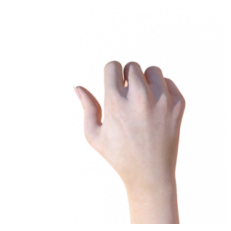

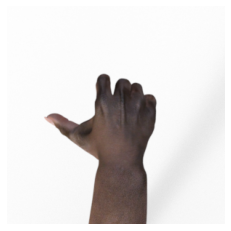

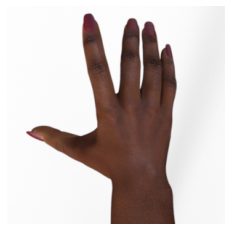

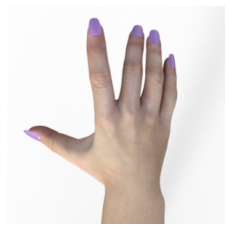

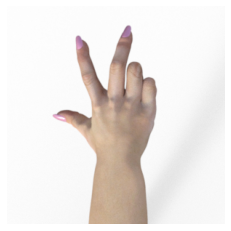

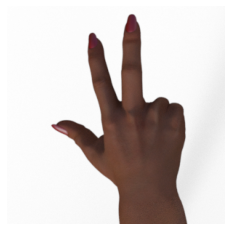

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index =2

next_rock = [os.path.join(rock_dir,fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i,img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR="rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [9]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 190s 9s/step - loss: 1.3029 - accuracy: 0.3349 - val_loss: 1.0771 - val_accuracy: 0.4059
Epoch 2/25
20/20 [==============================] - 165s 8s/step - loss: 1.1294 - accuracy: 0.4040 - val_loss: 1.0966 - val_accuracy: 0.4677
Epoch 3/25
20/20 [==============================] - 163s 8s/step - loss: 1.0666 - accuracy: 0.4286 - val_loss: 0.7124 - val_accuracy: 0.8118
Epoch 4/25
20/20 [==============================] - 160s 8s/step - loss: 0.9736 - accuracy: 0.5083 - val_loss: 0.6794 - val_accuracy: 0.8952
Epoch 5/25
20/20 [==============================] - 159s 8s/step - loss: 0.8205 - accuracy: 0.6329 - val_loss: 0.4102 - val_accuracy: 0.8306
Epoch 6/25
20/20 [==============================] - 169s 8s/step - loss: 0.6364 - accuracy: 0.7202 - val_loss: 0.5173 - val_accuracy: 0.6667
Epoch 7/25
20/20 [==============================] - 162s 8s/step - loss: 0.6085 - accuracy: 0.7516 - val_loss: 0.2330 - val_accuracy: 0.9247
Epoch 8/25
20

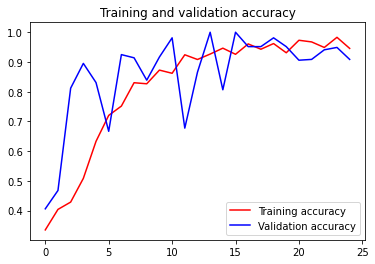

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 7.1.jpeg to 7.1.jpeg
7.1.jpeg
[[1. 0. 0.]]
